In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import linalg
from scipy.optimize import root_scalar
import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

We study the phase transition position when $L \times p$ is constant.

In [2]:
n = 10000
c_r = np.arange(0.01, 2, 0.01)
p_r = np.round(c_r*n).astype(int)

In [3]:
def get_pht(mem):
    L_r = np.round(mem/(c_r*n)).astype(int)
    eps_r = (2*L_r-1)/n
    pht_c = np.zeros(c_r.size)
    k_nu = 2*np.pi*np.arange(n)/n
    a, b = 1e-5, 50
    for i, (p, L) in enumerate(zip(p_r, L_r)):
        psi = utils.nu(L, k_nu)
        func_c = lambda t: p*np.mean((psi/((t+1)*psi[0]-psi))**2)-1
        if func_c(a)*func_c(b) < 0:
            res_c = root_scalar(func_c, method='brentq', bracket=[a, b])
            pht_c[i] = res_c.root if res_c.converged else np.nan
        else:
            pht_c[i] = np.nan
    return pht_c, L_r, eps_r

# Fixed memory size

In [4]:
mem_size = p_r[-1]*10 # Memory size (L*p)
pht_c, L_r, eps_r = get_pht(mem_size)

In [5]:
mask = (~np.isnan(pht_c))
slope = (c_r[mask]@pht_c[mask])/linalg.norm(c_r[mask])**2
print("Estimated slope:\t{}".format(slope))

Estimated slope:	15.982231848129377


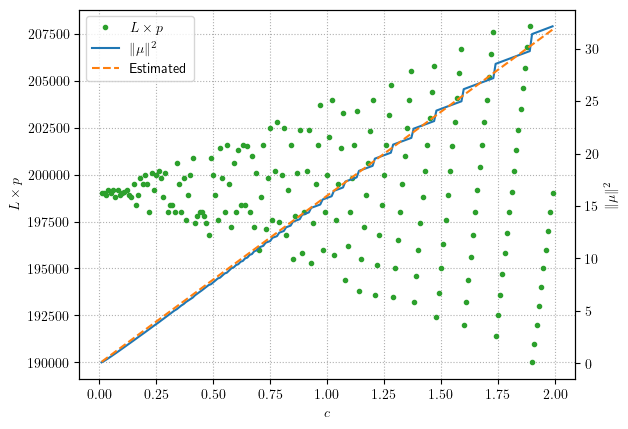

In [6]:
plt.plot(c_r, (L_r*p_r), ls='', marker='.', color='C2', label="$L \\times p$")
plt.grid(ls=':')
plt.xlabel("$c$")
plt.ylabel("$L \\times p$")
ax1 = plt.gca()
ax2 = plt.twinx()
plt.plot(c_r, pht_c, color='C0', label="$\\| \\mu \\|^2$")
plt.plot(c_r, slope*c_r, ls='--', color='C1', label="Estimated")
plt.ylabel("$\\| \\mu \\|^2$")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1+lines2, labels1+labels2)
plt.show()

# Variable memory size

In [7]:
N = 100
mem_r = np.linspace(p_r[-1], p_r[-1]*N, N).astype(int)
slope_r = np.zeros(N)
for i, mem in enumerate(tqdm(mem_r)):
    pht_c, _, _ = get_pht(mem)
    mask = (~np.isnan(pht_c))
    slope_r[i] = (c_r[mask]@pht_c[mask])/linalg.norm(c_r[mask])**2

100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


Model: $$\frac{\left\lVert \mu \right\rVert^2}{c} = \frac{\alpha}{\sqrt{L \times p}} + \beta.$$

In [8]:
x = 1/np.sqrt(mem_r)
y = slope_r

det = N*linalg.norm(x)**2-np.sum(x)**2
alpha = (N*(x@y)-np.sum(x)*np.sum(y))/det
beta = (np.sum(y)*linalg.norm(x)**2-np.sum(x)*(x@y))/det

In [9]:
print("alpha = {}\nbeta = {}".format(alpha, beta))
print(alpha/n)

alpha = 7512.760572842395
beta = -0.6014554120622784
0.7512760572842395


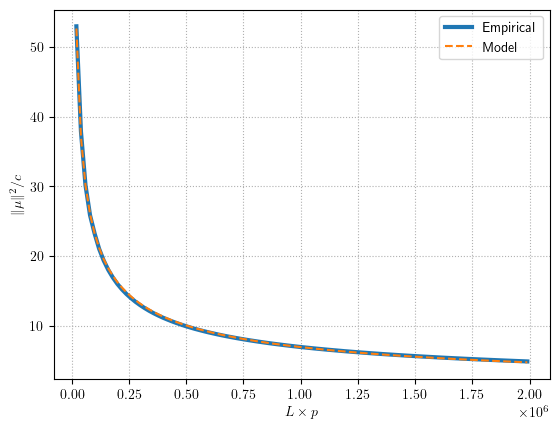

In [10]:
plt.plot(mem_r, slope_r, lw=3, label="Empirical")
plt.plot(mem_r, alpha/np.sqrt(mem_r)+beta, ls='--', label="Model")
plt.grid(ls=':')
plt.xlabel("$L \\times p$")
plt.ylabel("$\\| \\mu \\|^2 / c$")
plt.legend()
plt.show()